# Computer Project #2

A cylindrical fuel rod of radius $R$ is cooled by fluid around it, with heat transfer coefficient $h$. Consider the rod to be infinite in the $z$ direction. The bulk coolant temperature is $T_{b0}$. The fuel element is made of UO2 ($R=0.5$ cm). Density = 10.75 g/cm^3, k = 2 W/(m-K), Cp = 84 J/(mol-K).

## ANALYTICAL SOLUTION

(a) Find the steady-staate temperature distribution for $t<0$, $T_{i}(r)$, in the fuel rod due to ta sparially uniform heat generation term of $\dot{q}_{0}$ (W/cm^3). What value of $\dot{q}_{0}$ (in kW/m^3) will lead to the maximum temperature in the fuel rod to be 700 C?  

Use the value of $\dot{q}_{0}$ in the rest of this project. Plot temperature of the radial coodinate.

(answer)  
From given problem statement, we first need to consider the steady state. The heat conduction equation at the steady state is described as
$$
\frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) + \frac{\dot{q}_{0}}{k} = 0
$$
where boundary conditions:
$$
\text{BC1 (symmetry) : } T = finite \text{ at } r =0 
$$

$$
\text{BC2 (convection) : } -k \frac{dT}{dr}|_{r=R} = h(T(R)-T_{b0})
$$


Solve for $T(r)$:
$$
\begin{align*}
 \frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) + \frac{\dot{q}_{0}}{k} &= 0\\ 
 \frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) &= -  \frac{\dot{q}_{0}}{k}\\
 \frac{d}{dr}(r \frac{dT}{dr}) &= - \frac{\dot{q}_{0}r}{k}
\end{align*}
$$

Integrate both hand sides for $r$:

$$
\begin{align*}
 r \frac{dT}{dr} &= - \frac{\dot{q}_{0}r^2}{2k} + C_{1}\\
 \frac{dT}{dr} &= - \frac{\dot{q}_{0}r}{2k} + \frac{C_{1}}{r}
\end{align*}
$$

Integrate both hand sides again:

$$
    T(r) = - \frac{\dot{q}_{0}r^2}{4k} + C_{1}\ln{r} + C_{2}
$$

From the BC1, the coefficient $C_{1} = 0$. Hence,
$$
T(r) = - \frac{\dot{q}_{0}r^2}{4k} + C_{2}
$$

Apply the BC2, the $C_{2}$ is expressed as:
$$
C_{2} = \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
$$

Therefore, $T(r)$ is

$$
T(r) = -\frac{\dot{q}_{0}r^2}{4k} +  \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
$$

Since the geometry is a cylindrical and the heat generation is uniform, the centerline ($r=0$) goes to the maximum temperature.  
Substitute $r=0$ and $T(r=0)=700$ C for finding $\dot{q}_{0}$:

$$
(-\frac{R}{2h} + \frac{R^2}{4k})\dot{q}_{0} = T(r=0) - T_{b0} (=400)
$$

Solve for $\dot{q}_{0}$:
$$
\dot{q}_{0} = 125764.2 \text{  ($\rm kW/m^3$) }
$$

The following cells show the plot of the temperature distribution.

In [102]:
import matplotlib.pyplot as plt
import numpy as np

In [103]:
''' 
define given parameters
'''
R = 0.5 # radius of fuel [cm]
rho = 10.75 # density of fuel [kg/m^3]
k = 0.02 # thermal conductivity of fuel [W/m-K]
cp = 84 * 1/270.03 # specific heat of fuel [J/g-K]

h = 4.5 # [W/m^2-K]
Tb0 = 300 # [K]
q0 = 125  # [W/cm^3]

tau, m = 0.02, 0.02

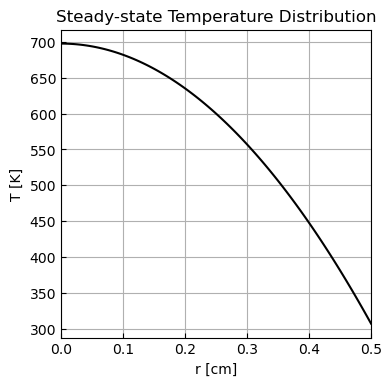

In [104]:
# T(r) = -\frac{\dot{q}_{0}r^2}{4k} +  \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
def T(r):
    return -q0 * r**2 / (4*k) + q0 * R / (2*h) + q0 * R**2 / (4*k) + Tb0

# plot T(r) vs r
r = np.linspace(0, R, 100)
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(r, T(r), 'k-')
ax.set_xlabel('r [cm]')
ax.set_ylabel('T [K]')
ax.set_title('Steady-state Temperature Distribution')
ax.grid(True)
ax.set_xlim(0, R)
plt.show()

# for use in later parts
T_ss = T(r)

(b) Assuming $h$ remains constant, the heat generation rate and the bulk coolant temperature start to change at $t=0$ with time as $\dot{q}(t)$ and $T_{b}(t)$. For $t>0$, find the anauytical expression for the temperature distribution in the fuel rod $T(r,t)$. Use the temperature distribution found in part (a) as your initial condition at $t=0$.

(answer)  
Solve the PDE using a finite integral transform technique.  
First assume the temperature $T(r,t) = \psi(r) \Gamma(t)$. Then, consider the eigenvalue problem(s) for $r$ and $t$.  

From the PDE, the radius part can be written as:
$$
\frac{1}{r}\frac{d}{dr}(r \frac{d\psi(r)}{dr}) + \lambda^2 \psi(r) = 0
$$
The general solution is:
$$
\psi_{n}(r) = C_{1}J_{0}(\lambda_{n}r) + C_{2}Y_{0}(\lambda_{n}r)
$$
Apply the boundary condition 1 ($C_{2}=0$) and the solution becomes:
$$
\psi_{n}(r) = C_{1}J_{0}(\lambda_{n}r)
$$
where $\lambda_{n}$ represents eigenvalues. 

Let $\bar{T}_{n}(r) \equiv \int_{r=0}^{R} r \psi_{n}(r) \cdot T(r,t) dr$.  
Operate $\bar{T}_{n}(r) \equiv \int_{r=0}^{R} r \psi_{n}(r)dr$ to the both hand sides of PDE.

$$
\begin{align*}
\frac{1}{\alpha} \frac{d \bar{T}_{n}}{dt} &= \sum_{r=0}^{R}r \psi_{n}(r) \frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr})dr + \frac{\bar{q}}{k}\\
&= \left[\frac{dT}{dr}\cdot r\psi_{n}(r)\right]_{r=0}^{R} - \left[ T \cdot r \frac{d\psi_{n}}{dr} \right]_{r=0}^{R} + \int_{r=0}^{R} rT \cdot \frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr})dr + \frac{\bar{q}}{k}\\
&= \frac{dT}{dr} |_{r=R}\cdot R\psi_{n}(R) - T(R)\cdot R \frac{d\psi_{n}}{dr}|_{r=R} - \lambda_{n}^2 \bar{T}_{n}+ \dot{q}(t)I_{n}
\end{align*}
$$
where the source term after the transformation is defined as:
$$
I_{n} \equiv  \int_{r=0}^{R}r \psi_{n}(r)dr
$$

By solving the PDE for $\bar{T}_{n}(t)$:
$$
\bar{T}_{n}(t) = A_{n}e^{-\alpha \lambda_{n}^{2}t} + \text{particular solution}
$$

Now, consider the particular solution(s) due to time-dependent heat generation rate and bulk temperature.  
The temperature after the transformation is finally expressed by the following:

$$
\bar{T}_{n}(t) = A_{n}e^{-\alpha \lambda_{n}^2 t} + \frac{I_{n}^2 + I_{n}}{\lambda_{n}^2} - \frac{I_{n}^2 \alpha}{m-\alpha \lambda_{n}^2}e^{- m t} - \frac{I_{n} \alpha}{\eta - \alpha \lambda_{n}^2}e^{- \eta t}
$$

$$
I = \left(\frac{RJ_{1}(\lambda_{1}R)}{\lambda_{n}} \right)
$$

Therefore,
$$
\bar{T}_{n}(t) = A_{n}e^{-\alpha \lambda_{n}^2 t} + \frac{I_{n}^2 + I_{n}}{\lambda_{n}^2} - \frac{I_{n}^2 \alpha}{m-\alpha \lambda_{n}^2}e^{- m t} - \frac{I_{n} \alpha}{\eta - \alpha \lambda_{n}^2}e^{- \eta t}
$$

Operate $\bar{T}_{n}(r) \equiv \int_{r=0}^{R} r \psi_{n}(r)dr$ to $T(r,t) = \sum_{n=1}^{\infty}C_{n}(t)\psi_{n}(r)$ and utilize the orthogonarity:

$$
\begin{align*}
\bar{T}_{n}(t) &= C_{n}(t) \int_{r=0}^{R}r J_{0}^2(\lambda_{n}r)dr \\

C_{n}(t) &= \frac{\bar{T}_{n}(t)}{\int_{r=0}^{R}r J_{0}^2(\lambda_{n}r)dr}
\end{align*}
$$

Now, compute the denominator (i.e., normalization factor); $\int_{r=0}^{R}r J_{0}^2(\lambda_{n}r)dr = \frac{R^2}{2}(J_{0}^2(\lambda_{n}R) + J_{1}^2(\lambda_{n}R))$.

$$
\begin{align*}
T(r,t=0) &=   \sum_{n=1}^{\infty}C_{n}(0)\psi_{n}(r)\\
&= - \frac{\dot{q}_{0}}{4k}r^2 + T_{b0} = \sum_{n=1}^{\infty}\frac{A_{n} + \frac{I_n^2 + I_n}{\lambda_{n}^2} - \frac{I_n^2 \alpha}{m-\alpha \lambda_n^2} - \frac{I_n \alpha}{\eta - \alpha \lambda_n^2}}{\int_{r=0}^{R}r J_{0}^2(\lambda_{n}r)dr}J_{0}(\lambda_n r)

\end{align*}
$$


Operate $\bar{T}_{n}(r) \equiv \int_{r=0}^{R} r \psi_{n}(r)dr$:

$$
\begin{align*}
\text{LHS} &= \int_{r=0}^{R}rJ_0(\lambda_n r)D_1 r^2 dr + \int_{r=0}^{R}rJ_0(\lambda_n r)D_2 dr\\

&= \frac{D_1 R^2}{\lambda_n^2} \left[ 2J_2 (\lambda_n R) - \lambda_n R J_3 (\lambda_n R)\right] + D_2 \left[ \frac{RJ_1 (\lambda_n R)}{\lambda_n} \right]

\end{align*}
$$

where

$$
D_1 = - \frac{\dot{q}_{0}}{4k}
$$

and

$$
D_2 = T_{b0}
$$

Summrize and both LRS and RHS, the coefficient $A_n$:

$$
A_n = \theta_n^1 + \theta_n^2 - PS_n^1 + PS_n^2 + PS_n^3
$$

where

$$
 \theta_n^1 = \frac{D_1 R^2}{\lambda_n^2} \cdot 2J_2 (\lambda_n R) + D_2 \left[ \frac{RJ_1 (\lambda_n R)}{\lambda_n} \right]
$$

$$
 \theta_n^2 = \frac{D_1 R^2}{\lambda_n^2} \cdot (-\lambda_n R J_3 (\lambda_n R)) 
$$

also, particular solution ($PS_n^i$):

$$
PS_n^1 = \frac{I_{n}^2 + I_{n}}{\lambda_{n}^2}
$$

$$
PS_n^2 = \frac{I_{n}^2 \alpha}{m-\alpha \lambda_{n}^2}
$$

$$
PS_n^3 = \frac{I_{n} \alpha}{\eta - \alpha \lambda_{n}^2}
$$



(c) Repeat part b by first splitting the temperature distribution into a transient and a steady-state profile; $T(r,t) = T_{tr}(r,t) + T_{ss}(r)$. To distinguish this expression from that obtrained in part b, call it $T_{split}(r,t)$. $T_{ss}(r)$ will be the stady-state temperature profile corresponding to the uniform heat generation that may exist as time tends to infinity.

(answer)

From Part (b), the eigenvalues must be obtained with the boundary condition 2.
$$
-\lambda_{n}J_{1}(\lambda_{n}R) + \frac{h}{k}J_{0}(\lambda_{n}R)=0
$$

Let assume the eivenvalues are given, then the temperature distribution can be expressed as:
$$
T_{tr}(r,t) = \sum_{n=1}^{\infty}C_{n}(t)\psi_{n}(r)
$$

Operate $\bar{T}_{n}(r) \equiv \int_{r=0}^{R} r \psi_{n}(r)dr$ to the both hand side of original PDE as we performed in part (b). In addition, functions of heat generation rate and bulk temperature given in part (d) were employed.

$$
\begin{align*}
\frac{1}{\alpha} \frac{d \bar{T}_{tr,n}}{dt} &= \frac{dT_{tr}}{dr} |_{r=R}\cdot R\psi_{n}(R) - T_{tr}(R)\cdot R \frac{d\psi_{n}}{dr}|_{r=R} - \lambda_{n}^2 \bar{T}_{tr, n}+ \dot{q}(t)I_{n}\\

\frac{1}{\alpha} \frac{d \bar{T}_{tr,n}}{dt} + \lambda_{n}^2 \bar{T}_{tr,n} &= \frac{dT}{dr} |_{r=R}\cdot R\psi_{n}(R) - T_{tr}(R)\cdot R \frac{d\psi_{n}}{dr}|_{r=R}  + \dot{q}(t)I_{n}\\
\end{align*}
$$

Then, substitute $\dot{q}(t)$ and $\dot{T}_{b}(t)$ into equation:

$$
\begin{align*}
\frac{1}{\alpha} \frac{d \bar{T}_{tr,n}}{dt} &= \frac{dT_{tr}(R,t)}{dr}\cdot R\psi_{n}(R) - T+{tr}(R)\cdot R \frac{d\psi_{n}(R)}{dr}  +  \frac{\dot{q}_{0}}{2}(1 + e^{- \eta t})\left(\frac{RJ_{1}(\lambda_{1}R)}{\lambda_{n}} \right) \\
&= \frac{dT_{tr}(R,t)}{dr}\cdot R\psi_{n}(R) + R \frac{h}{k}T_{tr}(R,t)\psi_{n}(R) + I_{n}(e^{- \eta t})\\

&= RJ_{0}(\lambda_{n}R) \left[ \frac{h}{k} \frac{T_{b0}}{2}(e^{- m t}) \right]+ I_{n}(e^{- \eta t})\\

&= I_{n}^2 (e^{- m t}) + I_{n}(e^{- \eta t})\\

&= I_{n}^2 e^{- m t} + I_{n}e^{- \eta t}
\end{align*}
$$

where

$$
I = \left(\frac{RJ_{1}(\lambda_{1}R)}{\lambda_{n}} \right)
$$

Therefore,
$$
\bar{T}_{tr,n}(t) = A_{n}e^{-\alpha \lambda_{n}^2 t} - \frac{I_{n}^2 \alpha}{m-\alpha \lambda_{n}^2}e^{- m t} - \frac{I_{n} \alpha}{\eta - \alpha \lambda_{n}^2}e^{- \eta t}
$$

Operate $\bar{T}_{tr,n}(r) \equiv \int_{r=0}^{R} r \psi_{n}(r)dr$ to $T_{tr}(r,t) = \sum_{n=1}^{\infty}C_{n}(t)\psi_{n}(r)$ and utilize the orthogonarity:

$$
\begin{align*}
\bar{T}_{tr,n}(t) &= C_{n}(t) \int_{r=0}^{R}r J_{0}^2(\lambda_{n}r)dr \\

C_{n}(t) &= \frac{\bar{T}_{tr,n}(t)}{\int_{r=0}^{R}r J_{0}^2(\lambda_{n}r)dr}
\end{align*}
$$

Now, compute the denominator (i.e., normalization factor); $\int_{r=0}^{R}r J_{0}^2(\lambda_{n}r)dr = \frac{R^2}{2}(J_{0}^2(\lambda_{n}R) + J_{1}^2(\lambda_{n}R))$.

$$
\begin{align*}
T(r,t=0) &=   \sum_{n=1}^{\infty}C_{n}(0)\psi_{n}(r)\\


&=\sum_{n=1}^{\infty}\frac{A_{n}  - \frac{I_n^2 \alpha}{m-\alpha \lambda_n^2} - \frac{I_n \alpha}{\eta - \alpha \lambda_n^2}}{\int_{r=0}^{R}r J_{0}^2(\lambda_{n}r)dr}J_{0}(\lambda_n r)

\end{align*}
$$

Operate $\bar{T}_{n}(r) \equiv \int_{r=0}^{R} r \psi_{n}(r)dr$:

$$
\begin{align*}
\text{LHS} &= \int_{r=0}^{R}rJ_0(\lambda_n r)D_1 r^2 dr + \int_{r=0}^{R}rJ_0(\lambda_n r)D_2 dr\\

&= \frac{D_1 R^2}{\lambda_n^2} \left[ 2J_2 (\lambda_n R) - \lambda_n R J_3 (\lambda_n R)\right] + D_2 \left[ \frac{RJ_1 (\lambda_n R)}{\lambda_n} \right]

\end{align*}
$$

where

$$
D_1 = - \frac{\dot{q}_{0}}{4k}
$$

and

$$
D_2 = T_{b0}
$$

Summrize and both LRS and RHS, the coefficient $A_n$:

$$
A_n = \theta_n^1 + \theta_n^2 + PS_n^2 + PS_n^3
$$

where

$$
 \theta_n^1 = \frac{D_1 R^2}{\lambda_n^2} \cdot 2J_2 (\lambda_n R) + D_2 \left[ \frac{RJ_1 (\lambda_n R)}{\lambda_n} \right]
$$

$$
 \theta_n^2 = \frac{D_1 R^2}{\lambda_n^2} \cdot (-\lambda_n R J_3 (\lambda_n R)) 
$$

also, particular solution ($PS_n^i$):

$$
PS_n^2 = \frac{I_{n}^2 \alpha}{m-\alpha \lambda_{n}^2}
$$

$$
PS_n^3 = \frac{I_{n} \alpha}{\eta - \alpha \lambda_{n}^2}
$$

(d) Evaluate the expressions for $T(r,t)$ and $T_{split}(r,t)$ for

$$
\dot{q}(t) = \frac{\dot{q}_{0}}{2}(1 + e^{- \eta t})
$$

$$
\dot{T}_{b}(t) = \frac{T_{b0}}{2}(1 + e^{- m t})
$$

(answer)  
Give expressions were already employed in part (d) and (c).

(e) Plot $\dot{q}(t)$ and $T_{b}(t)$ as a function of time for $m=\eta=0.015, 0.02, 0.025$ [$\text{s}^{-1}$].

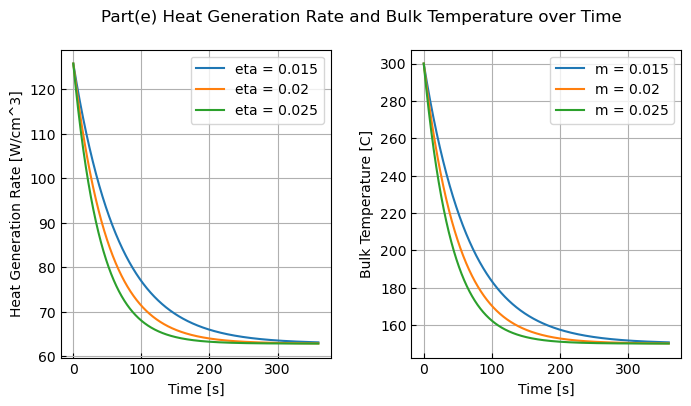

In [177]:
from scipy.interpolate import interp1d
import time

# Given parameters
T_max = 700  # [C]
R = 0.5  # radius of fuel [cm]
rho = 10.75  # density of fuel [g/cm^3]
k = 0.02  # thermal conductivity of fuel [W/cm-K]
cp = 0.3110765  # specific heat of fuel [J/g-K]
q_dot_0 = 125.76  # heat generation rate [W/cm^3]
h = 4.5  # convection coefficient [W/cm^2-K]
Tb0 = 300  # initial bulk temperature [K]
initial_cylinder_temp = 700 
# alpha
alpha = k / (rho * cp)

# Radial coordinates
r = np.linspace(0, R, 100)

# Heat generation rate function [W/cm^3]
def q(q_dot_0, eta, t):
    """Calculate the heat generation rate over time."""
    return q_dot_0 * 0.5 * (1 + np.exp(-eta * t))

# Bulk temperature function [C]
def Tb(Tb0, m, t):
    """Calculate the bulk temperature over time."""
    return Tb0 * 0.5 * (1 + np.exp(-m * t))

# Plotting heat generation rate and bulk temperature over time
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# for part (e)
eta = [0.015, 0.02, 0.025]
m = [0.015, 0.02, 0.025]

t_values = np.linspace(0, 360, 5000)

for i in range(len(eta)):
    ax[0].plot(t_values, q(q_dot_0, eta[i], t_values), label='eta = {}'.format(eta[i]))
    ax[1].plot(t_values, Tb(Tb0, m[i], t_values), label='m = {}'.format(m[i]))

ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Heat Generation Rate [W/cm^3]')
ax[0].grid(True)
ax[0].legend()

ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Bulk Temperature [C]')
ax[1].grid(True)
ax[1].legend()

fig.suptitle('Part(e) Heat Generation Rate and Bulk Temperature over Time')
plt.show()

Before going to the following questions, we need to obtain the eigenvalues with solving:

$$
- \lambda_{n}J_{1}(\lambda_{n}R) + \frac{h}{k}J_{0}(\lambda_{n}R)=0
$$

The eigenvalues are:
order = 1 λ = 4.76709
order = 2 λ = 10.94253
order = 3 λ = 17.15459
order = 4 λ = 23.37512
order = 5 λ = 29.59908
order = 6 λ = 35.82495
order = 7 λ = 42.05213
order = 8 λ = 48.28037
order = 9 λ = 54.50955
order = 10 λ = 60.73963
order = 11 λ = 66.97061
order = 12 λ = 73.20249
order = 13 λ = 79.43528
order = 14 λ = 85.66901
order = 15 λ = 91.90370
order = 16 λ = 98.13936


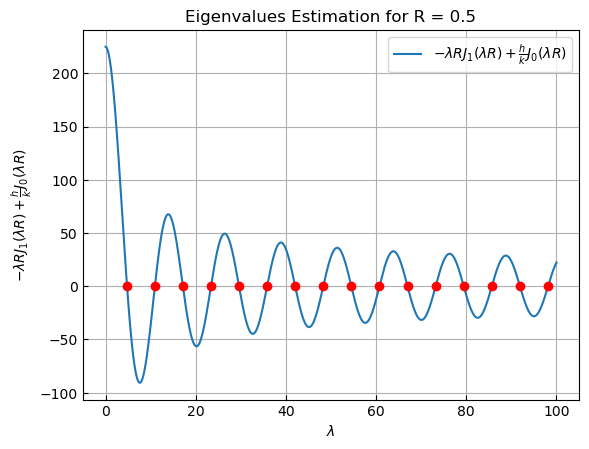

In [106]:
''' 
Find the eigenvalues of the Bessel function
'''
# -\lambda J_{1}(\lambda * R) + h/k * J_{0}(\lambda * R) = 0
from scipy.special import jv
from scipy.optimize import brentq

# Define constants
R = 0.5  # radius of fuel [cm]
k = 0.02  # thermal conductivity of fuel [W/cm-K]
h = 4.5  # convection coefficient [W/cm^2-K]


# Define the function whose roots we want to find
def func(lambda_val, R):
    return -lambda_val * jv(1, lambda_val * R) + h/k * jv(0, lambda_val * R)

'''
Please adjust lambda_max    
'''
lambda_max = 100

lambda_vals = np.linspace(0, lambda_max, 10000)  # Adjust range and density as needed
func_values = [func(val, R) for val in lambda_vals]

bracket_intervals = []
for i in range(1, len(func_values)):
    if func_values[i-1] * func_values[i] < 0:
        bracket_intervals.append((lambda_vals[i-1], lambda_vals[i]))

# Find the roots using the brackets obtained
eigenvalues = []
for bracket in bracket_intervals:
    try:
        root = brentq(func, bracket[0], bracket[1], args=(R))
        eigenvalues.append(root)
    except ValueError:
        pass

# Ensure uniqueness and sort eigenvalues
eigenvalues = sorted(set(eigenvalues))
eigenvalues = np.array(eigenvalues)

'''
If you want to get n th order eivenvalues,
eivenvalues[0:n] 
'''
#print(eigenvalues[0:5])

# Print the eigenvalues and number of roots
print("The eigenvalues are:")
for i, lambda_val in enumerate(eigenvalues):
    print(f"order = {i+1} λ = {lambda_val:.5f}")

# Plot the function to visualize the roots
plt.plot(lambda_vals, func_values, label=r'$-\lambda R J_1(\lambda R) + \frac{h}{k} J_0(\lambda R)$')
plt.plot(eigenvalues, [0]*len(eigenvalues), 'ro')  # Roots
plt.legend()
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$-\lambda R J_1(\lambda R) + \frac{h}{k} J_0(\lambda R)$')
plt.title('Eigenvalues Estimation for R = ' + str(R))
plt.grid(True)
plt.show()


(f) Plot the temperature profiles $T_{i}(r)$ for $ t< 0$, and $T_{ss}(r)$ as $t$ tends to infinity. Explain what happens as $t$ increases.

In [107]:
''' 
Normalization factor
'''
from scipy.special import jv

# where J_{0} is the Bessel function of the first kind of order 0
def Norm(lam, R):
    return R**2 / 2 * (jv(0, lam * R)**2 + jv(1, lam * R)**2)

#Norm(lambda_vals, R)

In [119]:
''' 
Compute A_n
'''
def A_n(lam, R, D1, D2, alpha, m, eta, option=None):
    # where J_{0} is the Bessel function of the first kind of order 0
    theta_n1 = D1 * R**2 / lam**2 * 2 * jv(2, lam * R) + D2 * R * jv(1, lam * R) / lam
    theta_n2 = D1 * R**2 / lam**2 * (-lam * R * jv(3, lam * R))
    I = R * jv(1, lam * R) / lam
    PS_n1 = (I**2 + I) / lam**2
    PS_n2 = I**2 * alpha / (m - alpha * lam**2)
    PS_n3 = I * alpha / (eta - alpha * lam**2)
    if option == None:
        return theta_n1 + theta_n2 - PS_n1 + PS_n2 + PS_n3
    elif option == 'sep':
        return theta_n1 + theta_n2 + PS_n2 + PS_n3

#_n(eigenvalues, R, -q0/(4*k), Tb0, 0.005980731801595652, 0.02, 0.02)

In [128]:
'''
Compute T_bar
\bar{T}_{n}(t) = A_{n}e^{-\alpha \lambda_{n}^2 t} + \frac{I_{n}^2 + I_{n}}{\lambda_{n}^2} - \frac{I_{n}^2 \alpha}{m-\alpha \lambda_{n}^2}e^{- m t} - \frac{z_{n}' \alpha}{\eta - \alpha \lambda_{n}^2}e^{- \eta t}
'''
def T_bar(lam, t, R, D1, D2, alpha, m, eta, option=None):
    I = R * jv(1, lam * R) / lam
    if option == None:
        return A_n(lam, R, D1, D2, alpha, m, eta) * np.exp(-alpha * lam**2 * t) + (I**2 + I) / lam**2 - I**2 * alpha / (m - alpha * lam**2) * np.exp(-m * t) - I * alpha / (eta - alpha * lam**2) * np.exp(-eta * t)
    elif option == 'sep':
        return A_n(lam, R, D1, D2, alpha, m, eta, option='sep') * np.exp(-alpha * lam**2 * t) - I**2 * alpha / (m - alpha * lam**2) * np.exp(-m * t) - I * alpha / (eta - alpha * lam**2) * np.exp(-eta * t)

#T_bar(eigenvalues, 1, R, -q0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep')


In [127]:
''' 
Compute C_n 
C_{n} &= \frac{\bar{T}_{n}(t)}{\int_{r=0}^{R}r J_{0}^2(\lambda_{n}r)dr}
'''
def C_n(lam, t, R, D1, D2, alpha, m, eta, option=None):
    if option == None:
        return T_bar(lam, t, R, D1, D2, alpha, m, eta) / Norm(lam, R)
    elif option == 'sep':
        return T_bar(lam, t, R, D1, D2, alpha, m, eta, option='sep') / Norm(lam, R)

#C_n(eigenvalues, 1, R, -q0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep')

In [132]:
''' 
Reconstruct T(r, t)
T(r, t) = \sum_{n=1}^{\infty} C_{n} J_{0}(\lambda_{n}r) e^{-\alpha \lambda_{n}^2 t}
'''
def T(n, r, t, R, D1, D2, alpha, m, eta, option=None):
    if option == None:
        return sum([C_n(lam, t, R, D1, D2, alpha, m, eta) * jv(0, lam * r) * np.exp(-alpha * lam**2 * t) for lam in eigenvalues[0:n]])
    elif option == 'sep':
        return sum([C_n(lam, t, R, D1, D2, alpha, m, eta, option='sep') * jv(0, lam * r) * np.exp(-alpha * lam**2 * t) for lam in eigenvalues[0:n]])

#T(5, r, 1, R, -q0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep')

(answer)

The temperature distribution obtained from analytical method and the steady-state temperature distribution are indicated in the cell below.  
- solid lines: profiles at 5 different time $t = t_1, t_2, t_3, t_4, t_5$
- dashed line: initial temperature profile obtained in part (a)
- $m=\eta=0.02$
- maximum number of eigenvalues: $i=16$

The first figure represents the temperature distribution obtained by separating the transient term and the steady state term. 
- For both cases, the initial temperature profile (obtained in part(a)) goes down over the space respecting to time. Finally, reach the steady state.
- It is obvious that both methods match each other as shown in following figures.
- Compared to part (b) and (c), the final solution looks different (i.e., $T(r,t)$ and $T_{split}(r,t)$). However, the important fact is we utilized an linearity for solving this problem. Therefore, the solutions should be match due to this reason.

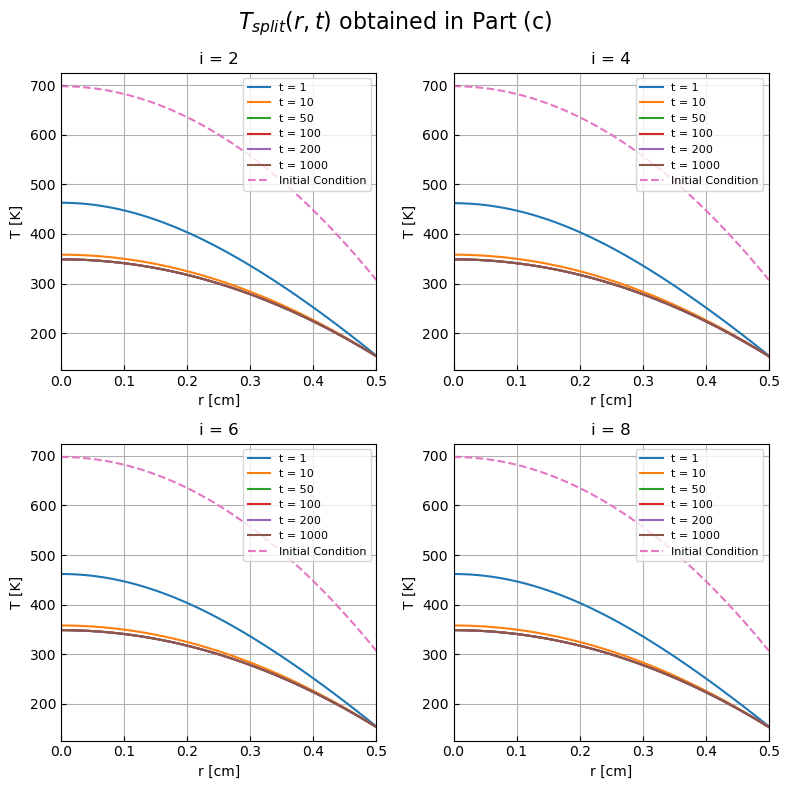

In [152]:
# Plotting T(r, t) vs r
t = np.array([1, 10, 50, 100, 200, 1000])

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle(r'$T_{split}(r, t)$ obtained in Part (c)', fontsize=16)
# Iterate over each subplot
# varying number of terms in the series
for i, ax in enumerate(axs.flat):
    # Calculate T for each time point and plot
    for t_i in t:
        T_i = (T_ss + T((i+1)*2, r, t_i, R, -q0/(4*k), Tb0, alpha, 0.02, 0.02))/2
        ax.plot(r, T_i, label=f't = {t_i}')
        ax.title.set_text(f'i = {(i+1)*2}')

    # Plot T_ss
    ax.plot(r, T_ss, ls='--', label='Initial Condition')

    # Set labels, title, and grid
    ax.set_xlabel('r [cm]')
    ax.set_ylabel('T [K]')
    ax.grid(True)
    ax.set_xlim(0, R)
    ax.legend(fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

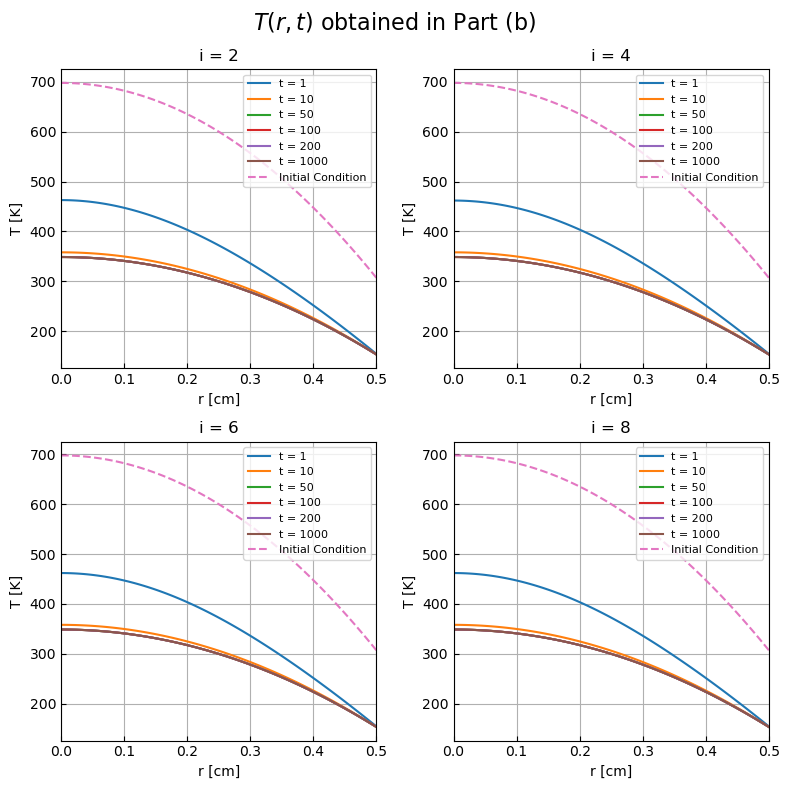

In [151]:
# Plotting T(r, t) vs r
t = np.array([1, 10, 50, 100, 200, 1000])
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle(r'$T(r, t)$ obtained in Part (b)', fontsize=16)
# Iterate over each subplot
# varying number of terms in the series
for i, ax in enumerate(axs.flat):
    # Calculate T for each time point and plot
    for t_i in t:
        T_i = (T_ss + T((i+1)*2, r, t_i, R, -q0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep'))/2
        ax.plot(r, T_i, label=f't = {t_i}')
        ax.title.set_text(f'i = {(i+1)*2}')

    # Plot T_ss
    ax.plot(r, T_ss, ls='--', label='Initial Condition')

    # Set labels, title, and grid
    ax.set_xlabel('r [cm]')
    ax.set_ylabel('T [K]')
    ax.grid(True)
    ax.set_xlim(0, R)
    ax.legend(fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

(g) For $m=\eta=0.02$, using the analytical expressions found in parts c and d, plot the temperature profiles $T(r,t)$ and $T_{split}(r,t)$ as a function of $r$ at 5 diferent time values greater than 0 ($0 < t_1 < t_2 < t_3 < t_4 < t_5$) to adequately captuure the transient.

(answer)  


Please confirm the following figures.

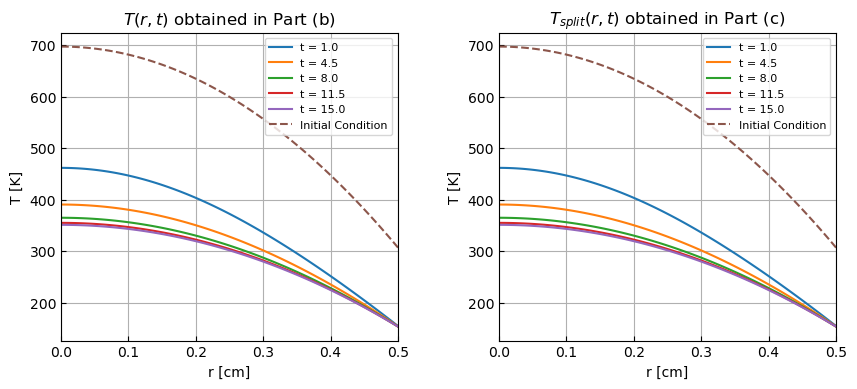

In [189]:
# Plotting T(r, t) vs r
t = np.linspace(1, 15, 5)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for t_i in t:
    ax[0].plot(r, (T_ss + T(5, r, t_i, R, -q0/(4*k), Tb0, alpha, 0.02, 0.02))/2, label=f't = {t_i}')
    ax[0].set_title(r'$T(r,t)$ obtained in Part (b)')
    ax[1].plot(r, (T_ss + T(5, r, t_i, R, -q0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep'))/2, label=f't = {t_i}')
    ax[1].set_title(r'$T_{split}(r,t)$ obtained in Part (c)')

for i in range(2):
    ax[i].plot(r, T_ss, ls='--', label='Initial Condition')
    ax[i].set_xlabel('r [cm]')
    ax[i].set_ylabel('T [K]')
    ax[i].grid(True)
    ax[i].set_xlim(0, R)
    ax[i].legend(fontsize=8, loc='upper right')


# Show the plot
plt.show()

(h) Show the characteristics of the analytical series solution (eigenvalues, number of temrs needed for convergence at different $t_i$, etc).  
- I: For each t, estimate how many terms in the series solution are necessary to assure reasonable convergence.
- II: Show the impact of the number of terms kept in the series solution for each value of $t_{i}$ on a separate graph. (Plot $T(r, t_i)$ for increasingly larger number of terms kept in the series.)
- III: Report the summary for all cases in a table.
- IV: Plot the converged $T(r, t_i)$ as a function of $f$ for all the cases on the same graph.
- V: Tabulate your eigenvalues and show all steps.
- VI: Comment on the convergence properties of the analytical solution (impact of number of terms needed for convergence).

(answer)  


In [88]:
# For each t, estimate how many terms in the series solution are necessary to assure reasonable convergence.
# convergence criteria: 1% error

# search for the number of terms in the series solution
t_search = t[1:]

''' 
for i in range(1, len(eigenvalues)):
    T_i = T_ss + T(i, r, t_search[0], R, -q0/(4*k), Tb0, alpha, 0.02, 0.02)
    T_i_1 = T_ss + T(i+1, r, t_search[0], R, -q0/(4*k), Tb0, alpha, 0.02, 0.02)
    if np.abs(T_i[-1] - T_i_1[-1]) / T_i[-1] < 0.01:
        print(f'converge at {i} terms')
        break
'''


" \nfor i in range(1, len(eigenvalues)):\n    T_i = T_ss + T(i, r, t_search[0], R, -q0/(4*k), Tb0, alpha, 0.02, 0.02)\n    T_i_1 = T_ss + T(i+1, r, t_search[0], R, -q0/(4*k), Tb0, alpha, 0.02, 0.02)\n    if np.abs(T_i[-1] - T_i_1[-1]) / T_i[-1] < 0.01:\n        print(f'converge at {i} terms')\n        break\n"

(i) Repeat part g for the following pairs of $m$ and $\eta$: (0.015, 0.02), (0.02, 0.015),(0.015, 0.025) and (0.025, 0.015). Discuss your results.

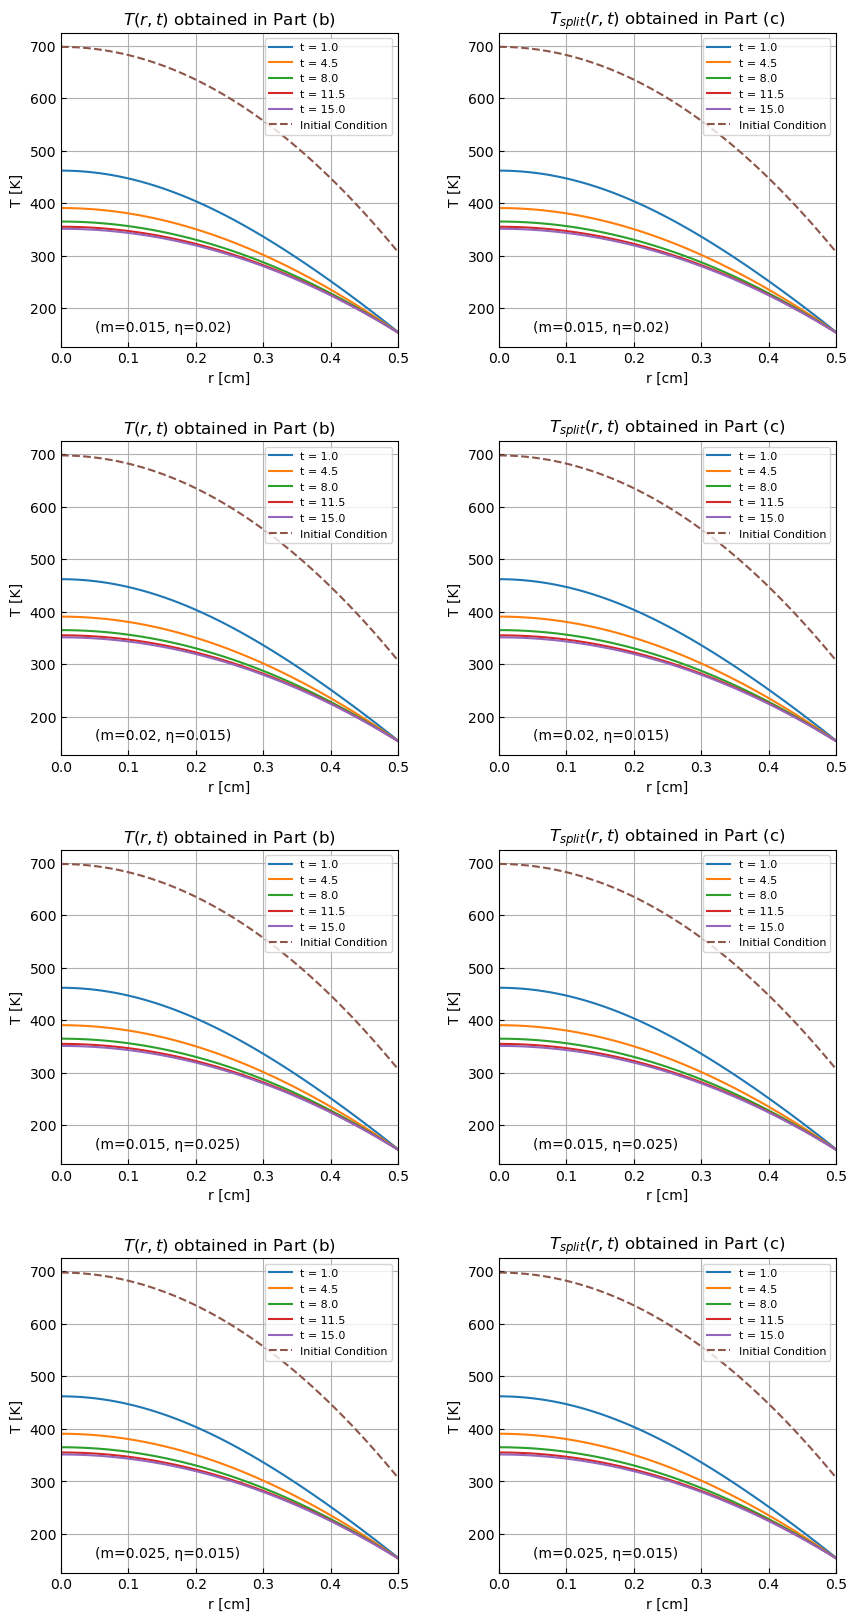

In [194]:
# Define pairs of (m, η)
pairs = [(0.015, 0.02), (0.02, 0.015), (0.015, 0.025), (0.025, 0.015)]

# Plotting T(r, t) vs r
t = np.linspace(1, 15, 5)

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Iterate over each pair of (m, η)
for i, (m, eta) in enumerate(pairs):

    # m and eta
    for t_i in t:
        axs[i, 0].plot(r, (T_ss + T(5, r, t_i, R, -q0/(4*k), Tb0, alpha, m, eta))/2, label=f't = {t_i}')
        axs[i, 0].set_title(r'$T(r,t)$ obtained in Part (b)')
        axs[i, 1].plot(r, (T_ss + T(5, r, t_i, R, -q0/(4*k), Tb0, alpha, m, eta, option='sep'))/2, label=f't = {t_i}')
        axs[i, 1].set_title(r'$T_{split}(r,t)$ obtained in Part (c)')

    for j in range(2):
        axs[i, j].plot(r, T_ss, ls='--', label='Initial Condition')
        axs[i, j].set_xlabel('r [cm]')
        axs[i, j].set_ylabel('T [K]')
        axs[i, j].grid(True)
        axs[i, j].set_xlim(0, R)
        axs[i, j].legend(fontsize=8, loc='upper right')
        axs[i, j].text(0.1, 0.05, f'(m={m}, η={eta})', transform=axs[i, j].transAxes)

# Show the plot
plt.show()

## B. NUMERICAL SOLUTION

Now, solve the problem numerically using a finite difference scheme (central difference for space, and explicit
in time). Show your work and include your computer code in an Appendix.

### (a) For the numerical solution obtained using an explicit finite difference method (for m = η = 0.02)

(i) Carry out a systematic study of the effects of the grid size and the time step on the accuracy of the solution. Devise a strategy to convince the reader that the number of grid points you are using is adequate but not an overkill. Implement the strategy and report your results. [Carry out a mesh refinement study to determine an adequate grid size.]

(ii) Also, convince the reader that the time step you used for each solution is small enough but not
unnecessarily small. [Carry out a time step refinement study to determine adequate time steps for
each simulation.]

(iii) Plot the converged analytical and numerical solutions for each ti and compare them.

### Answer (a)

### Finite Difference Formula
For each interior grid point $i$ where $1 \leq i \leq N_{r}-1$ and each time step $n$ where $0 \leq n \leq n_{t}$, the temperature $T$ is updsated using the formulara:
$$
T_{i, n+1} = T_{i, n} + \Delta t \left( \frac{k}{\rho \cdot Cp} \left( \frac{T_{i+1, n} - 2T_{i, n} + T_{i-1, n}}{\Delta r^2} + \frac{1}{r_i} \frac{T_{i+1, n} - T_{i-1, n}}{2 \Delta r} \right) + \frac{\dot{q}(t_n)}{\rho \cdot Cp} \right)
$$
where:
- $T_{i, n}$ is the temperature at grid point $i$ and time step $n$.
- $\Delta t$ is the time step size.
- $k$ is the thermal conductivity.
- $\rho$ is the density.
- $Cp$ is the specific heat capacity.
- $\Delta r$ is the radial step size.
- $r_i$ is the radial position corresponding to grid point $i$.
- $\dot{q}(t_n)$ is the heat generation rate at time $t_{n}$.

### Boundary Conditions

- At the center of the rod (symmetry condition): $T_{0, n+1} = T_{1, n+1}$
- At the outer surface of the rod (convective boundary condition): $T_{N_{r}, n+1} = T_{N_{r} - 1, n+1} + \Delta r \cdot \frac{h}{k} \cdot (T_{b}(t_{n+1}) - T_{N_{r} - 1, n+1})$



### Explanation

- The finite difference formula includes both diffusion (first term inside the parentheses) and radial contribution (second term inside the parentheses) due to the cylindrical geometry.
- The $\frac{1}{r_i} \frac{T_{i+1, n} - T_{i-1, n}}{2 \Delta r}$ term accounts for the radial variation in the cylindrical coordinate system.
- The term $\frac{\dot{q}(t_n)}{\rho \cdot Cp}$ represents the internal heat generation in the rod.
- The boundary conditions ensure that the symmetry at the center and convective heat transfer at the surface are properly modeled.

In [89]:
# Given parameters
T_max = 700  # [C]
R = 0.5  # radius of fuel [cm]
rho = 10.75  # density of fuel [g/cm^3]
k = 0.02  # thermal conductivity of fuel [W/cm-K]
cp = 0.3110765  # specific heat of fuel [J/g-K]
q_dot_0 = 125.76  # heat generation rate [W/cm^3]
h = 4.5  # convection coefficient [W/cm^2-K]
Tb0 = 300  # initial bulk temperature [K]
m = 0.02 # parameter for bulk temperature 
initial_cylinder_temp = 700  # initial cylinder temperature [K]
eta = 0.02 # parameter for heat generation

# alpha
#alpha = k / (rho * cp)
#print(alpha)


In [90]:
# Finite difference solution

def solve_heat_equation(Nr, Nt, T_end):
    dr = R / Nr
    dt = T_end / Nt
    r_values = np.linspace(0, R, Nr + 1)
    t_values = np.linspace(0, T_end, Nt + 1)

    # Initialize T using zeros
    T = np.full((Nr + 1, Nt + 1), initial_cylinder_temp, dtype=np.float64)

    for n in range(0, Nt):
        for i in range(1, Nr):
            # Finite difference scheme
            T[i, n + 1] = T[i, n] + dt * (
                k / (rho * cp) * ((T[i + 1, n] - 2 * T[i, n] + T[i - 1, n]) / dr**2 + 1 / r_values[i] * (T[i + 1, n] - T[i - 1, n]) / (2 * dr)) + 
                q(q_dot_0, eta, t_values[n]) / (rho * cp)
            )
        # Boundary conditions
        T[0, n + 1] = T[1, n + 1]
        T[Nr, n + 1] = T[Nr - 1, n + 1] + dr * h / k * (Tb(Tb0, m, t_values[n + 1]) - T[Nr - 1, n + 1])

    return r_values, t_values, T, dr, dt

# Error metric functions
def rmse(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.sqrt(np.mean((T1_interpolated - T2) ** 2))

def mae(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.mean(np.abs(T1_interpolated - T2))

In order to find the appropriate grid size in spatial domain, a mesh refinement study was performed. In this study, the fixed time step $dt=0.0002$ was employed.  
To ensure the enough convergence, Root-Mean Squared Errors (RMSE) and Mean-Squared Errors (MSE) were computed between the temperature distributions at the current meshsize and last meshsize. Also, the final time of transient was set to $1$ second.

In [91]:
# Mesh refinement study with error metrics
def mesh_refinement_study(Nr_values=None, Nt=5000, T_end=1):

    previous_T = None
    previous_r_values = None
    for Nr in Nr_values:
        r_values, t_values, T, dr, dt = solve_heat_equation(Nr, Nt, T_end)
        plt.plot(r_values, T[:, -1]/2, label=f'Nr={Nr}')

        if previous_T is not None:
            diff_rmse = rmse(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            diff_mae = mae(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            print(f'Nr={Nr}: RMSE={diff_rmse}, MAE={diff_mae}, dr={dr:.4f}, dt={dt:.4f}')

        previous_T = T
        previous_r_values = r_values

    plt.xlabel('Radius (cm)')
    plt.ylabel('Temperature (K)')
    plt.title('Temperature Distribution at T_end')
    plt.legend()
    plt.show()

In [92]:
'''
set up the mesh refinement study 
'''
Nr_values = [15, 30, 50, 100, 200, 300, 310]
Nt = 5000
T_end = 1

The computed RMSE and MAE for each mesh are listed in the following cell; it shows that in the setting of grid size being 310, error metrics repersent enough convergence less than 10\%. 

Nr=30: RMSE=26.091154572390707, MAE=17.892518860538193, dr=0.0167, dt=0.0002


Nr=50: RMSE=9.880545034260214, MAE=6.5467866538841575, dr=0.0100, dt=0.0002
Nr=100: RMSE=7.110013795366673, MAE=4.615546169804728, dr=0.0050, dt=0.0002
Nr=200: RMSE=3.468399514198673, MAE=2.224679915098679, dr=0.0025, dt=0.0002
Nr=300: RMSE=1.1445930781280544, MAE=0.7305329180871615, dr=0.0017, dt=0.0002
Nr=310: RMSE=0.07505771489089916, MAE=0.048184587124735036, dr=0.0016, dt=0.0002


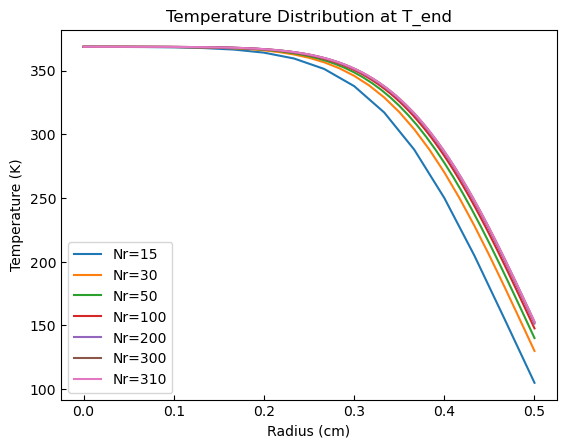

In [93]:
mesh_refinement_study(Nr_values, Nt, T_end)

In addition to the error metrics, convergence check was performed. As shown in the cell below, the temperatures at $r=0.01$ was computed for several mesh size defined in the previous setup (i.e., [15, 30, 50, 100, 200, 300, 310]). 
It represents that 
- Number of grid [15, 30, 50, 100]: the temperature changes drastically respecting to that number.
- Regions where it exceeds 100, the difference is moderated and approached to flat.

Based on these discussions, the adequent number of grid points is 100 in this study.

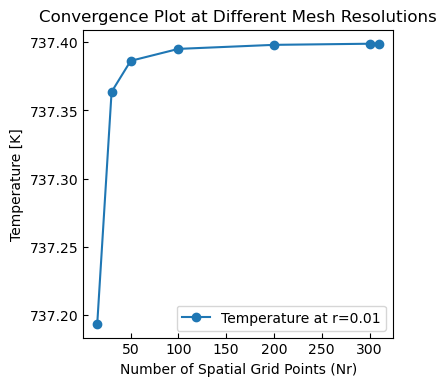

In [94]:
# Choose the radial coordinate for convergence comparison
convergence_radius = 0.01

# Initialize arrays to store temperatures at the chosen radial coordinate for each Nr
temperature_at_convergence = []

for Nr in Nr_values:
    r_values, t_values, T, _, _ = solve_heat_equation(Nr, Nt, T_end)
    
    # Find the index corresponding to the chosen radial coordinate
    r_index = np.abs(r_values - convergence_radius).argmin()
    
    # Store the temperature at the chosen radial coordinate for the last time step
    temperature_at_convergence.append(T[r_index, -1])

# Plot the convergence results
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(Nr_values, temperature_at_convergence, marker='o', linestyle='-', label=f'Temperature at r={convergence_radius}')
ax.set_xlabel('Number of Spatial Grid Points (Nr)')
ax.set_ylabel('Temperature [K]')
ax.set_title('Convergence Plot at Different Mesh Resolutions')
ax.legend()
plt.show()

### Answer (b)

To convince the reader that the time step I used for each solution is small enough but not unecessarily small, the effect of time step on the temperature distribution was studied.  
In this study, the appropriate time step was decided for each spacial grid size based on the Courant-Friedrichs-Lewy (CFL) number.

The CFL condition is a crucial concept in the numerical analysis of partial differential equations, particularly when using finite difference methods for time-dependent problems. It's a stability criterion that must be satisfied to ensure the stability of cerrtain types of  numerical schemes, like explicit methods, for solving partial differential equations.  

In a cylindrical geometry, the FCFL condition for heat transfer problems typically relates the thermal diffusivity, the radial discretization $\Delta r$ and the time step $\Delta t$. The CFL number for heat conduction in cylindrical coordinates can be expressed as:
$$
\text{CFL} =\frac{\alpha \Delta t}{(\Delta r)^2}
$$
In this study, the time step $\Delta t$ is decided to fulfill CFL=0.5.

In [95]:
''' 
set up the time refinement study 
'''
max_stable_dt_values = [] 

# Implement the stability analysis function calculate_max_stable_dt
def calculate_max_stable_dt(Nr):
    # CFL number (adjust as needed, typically a fraction like 0.5)
    CFL = 0.5

    # Spatial grid spacing
    dr = R / Nr

    # Maximum stable time step based on CFL condition
    max_stable_dt = CFL * dr**2 / k

    return max_stable_dt

for Nr in Nr_values:
    max_stable_dt = calculate_max_stable_dt(Nr)  # Implement a function to calculate max stable dt
    max_stable_dt_values.append(max_stable_dt)

The relationship between the number of spatial grid points and the appropriate time step is indicated in the cell below.  
The computed appropriate time steps are also shown.

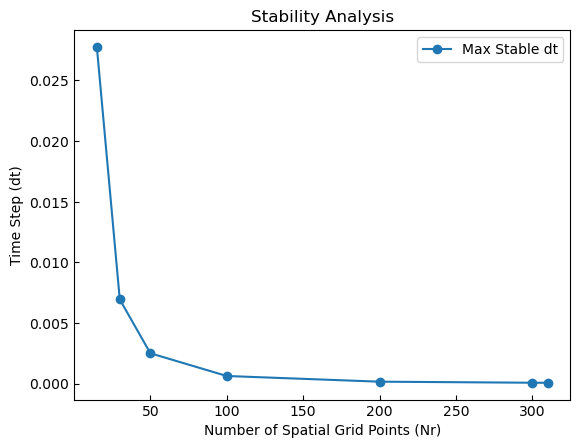

max stable dt=[0.027777777777777776, 0.006944444444444444, 0.0025, 0.000625, 0.00015625, 6.944444444444446e-05, 6.503642039542144e-05]


In [96]:
plt.plot(Nr_values, max_stable_dt_values, marker='o', linestyle='-', label='Max Stable dt')
plt.xlabel('Number of Spatial Grid Points (Nr)')
plt.ylabel('Time Step (dt)')
plt.title('Stability Analysis')
plt.legend()
plt.show()

print(f'max stable dt={max_stable_dt_values}')

In addition, the effect of time step on the computational time was studied with a fixed spatial number of grid = 100.  

In [97]:
# Updated function to study the effect of dt with computation time
def study_dt_effect(Nr_fixed, dt_values, T_end):


    computation_times = []  # To store computation times for each dt

    for dt in dt_values:
        Nt = int(T_end / dt)  # Calculate the number of time steps based on dt

        # Measure computation time
        start_time = time.time()
        _, _, _, _, _ = solve_heat_equation(Nr_fixed, Nt, T_end)
        end_time = time.time()
        computation_time = end_time - start_time
        computation_times.append(computation_time)

    # Plot dt_values vs computational time
    plt.plot(dt_values, computation_times, marker='o', linestyle='-')
    plt.xlabel('dt Values')
    plt.ylabel('Computation Time (seconds)')
    plt.xscale('log')
    plt.title(f'Computational Time vs dt for Nr={Nr_fixed}')
    plt.grid(True)
    plt.show()


The figure represents the relationship between the time-step and the computational time with the fixed spational number of grid. 
It indicates that when the value of dt is larger than 0.03, the computational time drastically increases.

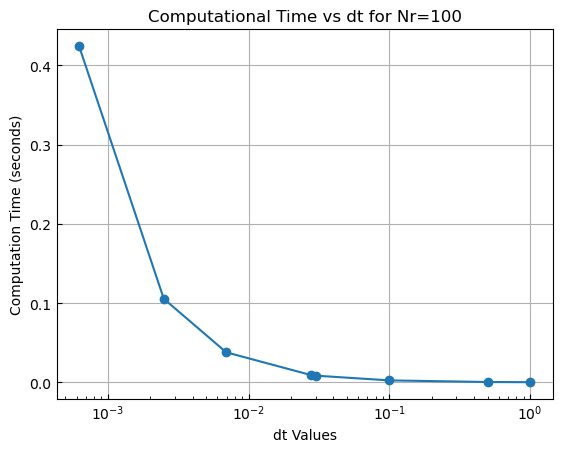

In [98]:
Nr_fixed = 100
dt_values = [1, 0.5, 0.1, 0.03, 0.027777777777777776, 0.006944444444444444, 0.0025, 0.000625]  # Specify the dt values you want to investigate
study_dt_effect(Nr_fixed, dt_values, T_end=1)